# Discrete Fourier Transform

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.utils import preprocess

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

## Loading data

In [2]:
# Open files
Data_X_train = pd.read_csv('data/challenge_fichier_dentrees_dentrainement_challenge_nba/train.csv')
Data_Y_train = pd.read_csv('data/challenge_fichier_de_sortie_dentrainement_challenge_nba.csv', sep=';')
X_test = pd.read_csv('data/challenge_fichiers_dentrees_de_test_challenge_nba/test.csv')

In [43]:
X_train, Y_train, X_val, Y_val = preprocess(Data_X_train, Data_Y_train, 0.7, True)

## Features extraction

In [18]:
X_train_fft = np.fft.fft(X_train)

### Score

In [53]:
filter_col = [col for col in Data_X_train if col.startswith('score')]
X_score = Data_X_train[filter_col]
X_score = X_score.as_matrix()
X_score_fft = np.fft.fft(X_score)

D:\Programs\Anaconda3\lib\site-packages\matplotlib\patches.py:693: ComplexWarning: Casting complex values to real discards the imaginary part
  self._height = float(height)


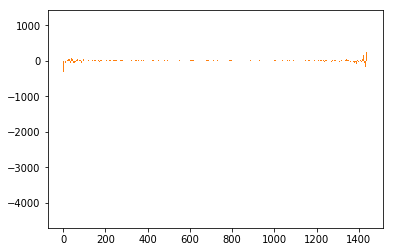

In [57]:
x = np.arange(1440)
plt.bar(x, X_score_fft[1,:], 1)
plt.show()

## First frequencies

In [139]:
nb_freq = 1000

In [140]:
X = []
main_features = ['miss', 'score', 'assist', 'offensive rebound']
for feat in main_features :
    filter_col = [col for col in Data_X_train if col.startswith(feat)]
    X_feat = Data_X_train[filter_col].as_matrix()
    X_feat_fft = np.fft.fft(X_feat)[:,:nb_freq]
    X.append(abs(X_feat_fft))
X_fft = np.hstack(X)

**Split data**

In [141]:
# Size of train
portion_train = 0.7
nb_games = len(X_fft)
n_train = int(portion_train*nb_games)
n_val = nb_games - n_train
id_train = np.random.choice(nb_games, n_train, replace=False)

# Def Y
Y = Data_Y_train.as_matrix()[:,1:]

# Def train and validation data
X_train = X_fft[id_train,:]
Y_train = Y[id_train,:].reshape(n_train,)
X_val = np.delete(X_fft, id_train, axis = 0)
Y_val = np.delete(Y, id_train, axis = 0).reshape(n_val,)

## MLP CLassifier

In [142]:
model = MLPClassifier()
model.fit(X_train, Y_train)
score = model.score(X_val, Y_val)
print("Validation Accuray : {}%".format(score*100))

Validation Accuray : 44.31486880466473%


In [134]:
model.predict(X_val)

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)